Données extraites de l'article:


Lambert Étienne, « [Le marché foncier et la noblesse dans la région de Vassy (Normandie, 1760-1789)](https://doi.org/10.4000/histoiremesure.909)», Histoire & mesure 17(2002)1/2), pp. 163‑199. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipysankeywidget import SankeyWidget



In [3]:
file = 'public_data/Lambert_2002_marche_foncier_donnees.csv'
marche = pd.read_csv(file, sep='|')
marche.head()

,Année,Nb. transactions,Prix moyen seigle Domfront,Valeur total trans.,Valer hors nobles,Valeur nobles,% val noble,val noble corrige,valeurs soustraites
0,1760,125,3.5,80.0,70.0,10.0,12.500000,10,0
1,1761,195,3.8,70.0,64.0,6.0,8.571429,6,0
2,1762,190,3.9,80.0,60.0,20.0,25.000000,20,0
3,1763,205,4.2,70.0,60.0,10.0,14.285714,10,0
4,1764,125,3.5,50.0,45.0,5.0,10.000000,5,0


In [17]:
df = marche[marche['Année'] < 1778]

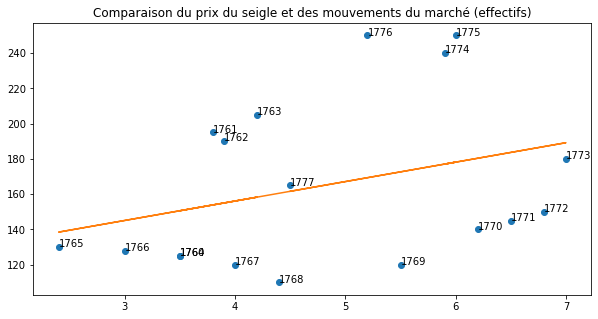

In [18]:
##
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(df['Prix moyen seigle Domfront'])
y = np.array(df['Nb. transactions'])

plt.rcParams["figure.figsize"] = [10, 5]

plt.plot(x, y, 'o')
plt.title("Comparaison du prix du seigle et des mouvements du marché (effectifs)")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

for i, label in enumerate(df['Année']):
    plt.annotate(label, (x[i], y[i]))
plt.show()

In [19]:
### Coéfficient de corrélation de Pearsons
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0]

0.3236216719595455

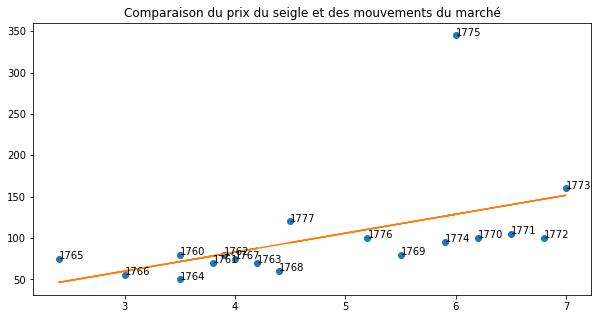

In [20]:
##
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(df['Prix moyen seigle Domfront'])
y = np.array(df['Valeur total trans.']) #  Valeur total tans. / Valeur nobles  / val noble corrige

plt.rcParams["figure.figsize"] = [10, 5]

plt.plot(x, y, 'o')
plt.title("Comparaison du prix du seigle et des mouvements du marché")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

for i, label in enumerate(df['Année']):
    plt.annotate(label, (x[i], y[i]))


In [21]:
### Coéfficient de corrélation de Pearsons
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0]

0.4783177246488088

### Une variable cachée à mettre en évidence

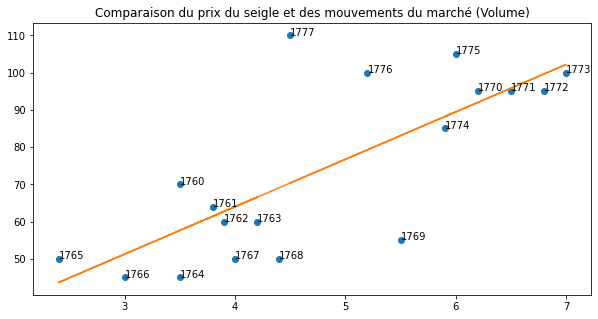

In [22]:
##
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(df['Prix moyen seigle Domfront'])
y = np.array(df['Valer hors nobles'])

plt.rcParams["figure.figsize"] = [10, 5]

plt.plot(x, y, 'o')
plt.title("Comparaison du prix du seigle et des mouvements du marché (Volume)")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

for i, label in enumerate(df['Année']):
    plt.annotate(label, (x[i], y[i]))


In [23]:
### Coéfficient de corrélation de Pearsons
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0]

0.7496842881142481

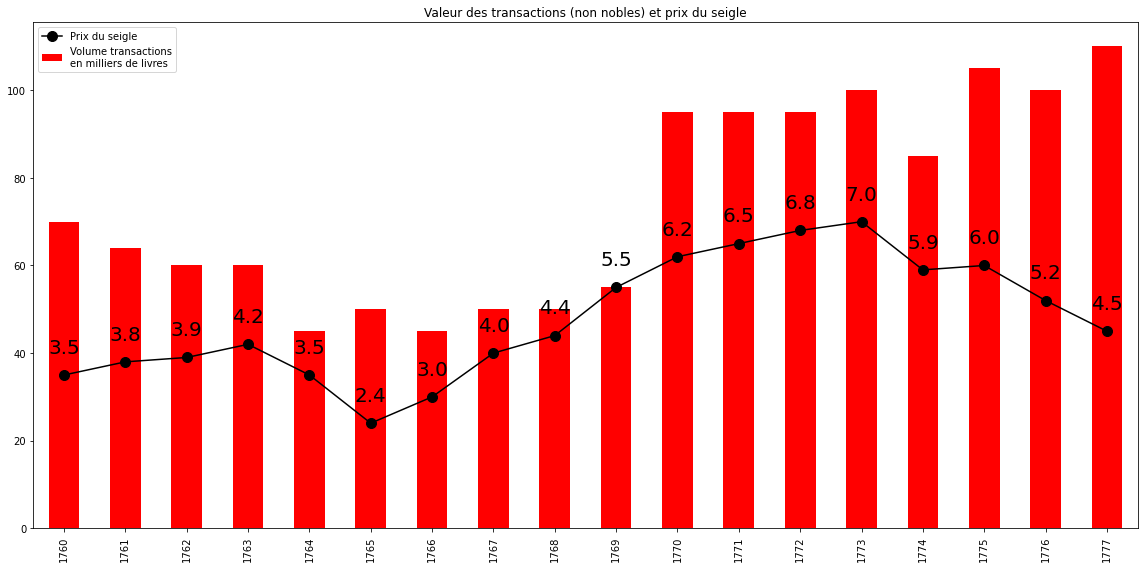

In [24]:
plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df['Valer hors nobles'].plot(kind='bar', color='red')

va1 = [a*10 for a in df['Prix moyen seigle Domfront']]
plt.plot(va1, marker='o', color='black', ms=10)
ax.set_xticklabels(df['Année'])
for i, v in enumerate(va1):
    ax.text(i, v + 5, v/10, ha="center", fontsize=20 )

plt.title('Valeur des transactions (non nobles) et prix du seigle',fontsize=12)
16
plt.legend(['Prix du seigle', 'Volume transactions\nen milliers de livres'],loc=2)

plt.show()

## Les flux des ventes de la noblesse

In [25]:
source = "public_data/sankey_ventes.csv"
s1 = pd.read_csv(source, sep='|')
s1.head()

,source,target,value
0,Noblesse,à Noblesse,20.950486
1,Noblesse,à Laboureur,7.885553
2,Noblesse,à Paysan,2.158075
3,Noblesse,à Journalier,0.108338
4,Noblesse,à Commerce,29.744837


In [26]:
sq_dict = s1.to_dict(orient='records')
sq_dict

[{'source': 'Noblesse', 'target': 'à Noblesse', 'value': 20.9504864247597},
 {'source': 'Noblesse', 'target': 'à Laboureur', 'value': 7.88555292843078},
 {'source': 'Noblesse', 'target': 'à Paysan', 'value': 2.1580752366242297},
 {'source': 'Noblesse', 'target': 'à Journalier', 'value': 0.108338396445329},
 {'source': 'Noblesse', 'target': 'à Commerce', 'value': 29.7448374558045},
 {'source': 'Noblesse', 'target': 'à Artisanat', 'value': 0.5618224275120971},
 {'source': 'Noblesse',
  'target': 'à Prof. libérale',
  'value': 2.65978083435206},
 {'source': 'Noblesse', 'target': 'à Clergé', 'value': 4.88273100600985},
 {'source': 'Noblesse', 'target': 'à Inconnu', 'value': 1.7309437884766001},
 {'source': 'Laboureur', 'target': 'à Noblesse', 'value': 3.3008440146696003},
 {'source': 'Paysan', 'target': 'à Noblesse', 'value': 2.25836145495538},
 {'source': 'Journalier', 'target': 'à Noblesse', 'value': 0.18620661889041},
 {'source': 'Commerce', 'target': 'à Noblesse', 'value': 20.965584258

In [27]:
w1 = SankeyWidget(links=sq_dict, layout=dict(width='800'), margins=dict(top=0, bottom=0, left=100, right=100))

In [28]:
w1

SankeyWidget(layout=Layout(width='800'), links=[{'source': 'Noblesse', 'target': 'à Noblesse', 'value': 20.950…